# Activity 2.1 Linear Regression

Objective(s):

This activity aims to perform regression analysis using linear regression

Intended Learning Outcomes (ILOs):
* Demonstrate how to use python to predict the outcome using linear regression.
* Demonstrate how to use single and multiple features to predict the outcome using linear regression.




Resources:
* Jupyter Notebook
* stores_dist.csv
* real_estate_price_size_year.csv
* Ames_Housing_Sales.csv 



Procedure:

Import the libraries and the data

In [1]:
#import the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [2]:
#import the stores_dist.csv data

salesDist = pd.read_csv(r'C:\Users\core i5\Desktop\GitHub\DataScience\datascience\CPE 312\Linear Regression\activities\dataset\stores-dist.csv')

#check the imported data

salesDist.head()


,district,annual net sales,number of stores in district
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


Rename the annual sales to sales and number of stores in district to stores

In [4]:
#rename the annual sales to sales and the  number of stores in district to stores

salesDist = salesDist.rename(columns={'annual net sales':'sales','number of stores in district':'stores'})

#check the salesDist data to verify if the columns were renamed.

salesDist.head()
# the names of the 2nd and 3rd columns were indeed changed.


,district,sales,stores
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


Determine the correlation

In [5]:
#check the correlation
salesDist.corr()


,district,sales,stores
district,1.000000,0.136103,-0.230617
sales,0.136103,1.000000,-0.912236
stores,-0.230617,-0.912236,1.000000


Interpret the correlation.

sales and distric have a positive correlation of 0.136 which is not that strong. Their linear relationship is very weak. Stores and districts have a weak, negative correlation. 

Stores and and Sales on the other have a strong but negative coorelation. This suggests that the two variables are moving in opposite size and direction from one another. They seem to portray an inverse, linear relationship.

It seems that disctric has the least correlated with the other columns.

Drop the column with the lowest correlation and verify the dataframe if the column was deleted.

In [6]:
#type your 
sales = salesDist.drop('district',axis=1)

sales.head()

,sales,stores
0,231.0,12
1,156.0,13
2,10.0,16
3,519.0,2
4,437.0,6


From the correlation coefficent data, what type of correlation did you observe between annual net sales and number of stores in the district?

Stores and and Sales on have a strong but negative coorelation. This suggests that the two variables are moving in opposite size and direction from one another. They seem to portray an inverse, linear relationship.

Create a plot to visualize the data. You will also assign stores as the independent variable $x$ and sales as the dependent variable $y$.

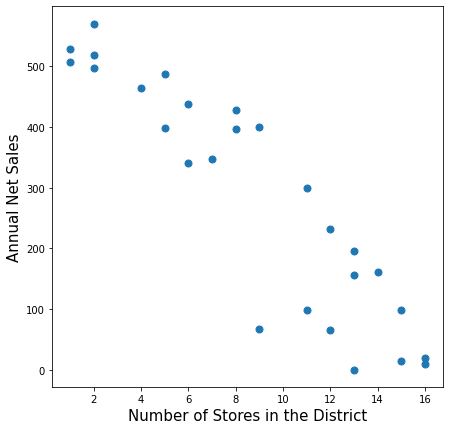

In [15]:
# dependent variable for y axis
y = sales['sales']
# independent variable for x axis
x = sales.stores


# Display the plot inline
%matplotlib inline

# Increase the size of the plot
plt.figure(figsize=(7,7))

# Create a scatter plot: Number of stores in the District vs. Annual Net Sales
plt.plot(x,y, 'o', markersize = 7)

# Add axis labels and increase the font size
plt.ylabel('Annual Net Sales', fontsize = 15)
plt.xlabel('Number of Stores in the District', fontsize = 15)
# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Display the scatter plot
plt.show()

Calculate the slope and y-intercept of the linear regression line.

In [16]:
m, b = np.polyfit(x,y,1) 
print ('The slope of line is {:.2f}.'.format(m))
print ('The y-intercept is {:.2f}.'.format(b))
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b))

The slope of line is -35.79.
The y-intercept is 599.38.
The best fit simple linear regression line is -35.79x + 599.38.


Using the linear regression line, you can predict the annual net sales based on the number of stores in the district.

In [17]:
# Function to predict the net sales from the regression line
def predict(query):
    if query >= 1:
        predict = m * query + b
        return predict
    else:
        print ("You must have at least 1 store in the district to predict the annual net sales.")

In [18]:
# Enter the number of stores in the function to generate the net sales prediction.
predict(4)

456.2313681207655

# Using statsmodel to perform Multivariable Linear Regression

Import the libraries. Make sure to install all the libraries to avoid errors. 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

Load the data real_estate_price_size_year.csv and verify the data.

In [21]:
data = pd.read_csv(r'C:\Users\core i5\Desktop\GitHub\DataScience\datascience\CPE 312\Linear Regression\activities\dataset\real_estate_price_size_year.csv')
data.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


Show the descriptive statistic analysis 

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

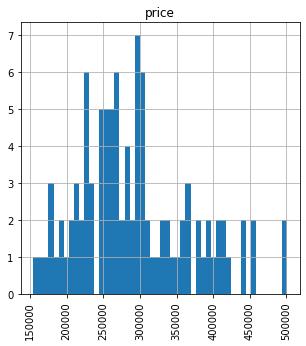

In [31]:
data.hist(column='price',bins=50,figsize=(5,5), xlabelsize=10, ylabelsize=10, xrot=90)

In [33]:
stats = data.describe()
stats

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [37]:
CV_price = stats['price']['std']/stats['price']['mean']
CV_size = stats['size']['std']/stats['size']['mean']
CV_year = stats['year']['std']/stats['year']['mean']
print(CV_price)
print(CV_size)
print(CV_year)

0.2636144486578891
0.34927725458236075
0.002349707172746235


Interpret the count, mean, min and std

* the count means that there are 100 data points for this data frame
* The mean suggests that the average price of the houses is 292289.470160, the average size of the houses is 853.0242, and the average year is 2012.
* The standard deviation suggests the spread of the data around the mean. Usually Coefficient of variation is a measure of the spread of the data around the mean and can tell us whether the Std is high or low in a given data set. If CV >= 1, then we have a relatively high variation. CV < 1, suggestst that the data variation is relatively low. Since all of our CVs for all the columns are less than 1, then we can say that there is relatively low variation for the data points in each column

Calcuate the multiple linear regression. Set the dependent variable and independent variable

In [38]:
# Following the regression equation, our dependent variable (y) is the price
y = data ['price']
# Similarly, our independent variable (x) is the size and year
x1 = data [['size','year']]

In [39]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()

In [42]:
# provide summary of the results statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           2.77e-32
Time:                        19:46:06   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.0

Interpret the result. Explain the adjusted R squared , coef and standard error.

* The adjusted R squared is 0.772, which is a high value. This means that the model is good.
* coef column explains the relationship between the independent variable and the dependent variable. The const-coef is the y-intercept; the size-coef is the slope coefficient for the size of the house; the year-coef is the slope coefficient for the year of the house.
* the standard error essentially is the SD of the mean of the all the sample's means. it is used alongside the the coef to determine the t-value. The smaller the std error, the more precise the estimate. In this case, our std errors for const and year are really high.

### Using sklearn to perform Linear Regression

Import the data using Pandas. 
Check the data. 
Examine the data types and shape of the dataset.

In [43]:
import pandas as pd
import numpy as np

# Import the data using the file path

data = pd.read_csv(r'C:\Users\core i5\Desktop\GitHub\DataScience\datascience\CPE 312\Linear Regression\activities\dataset\Ames_Housing_Sales.csv')

print(data.shape)

(1379, 80)


In [45]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [44]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

In [47]:
# Select the object (string) columns
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]

categorical_cols

C:\Users\core i5\AppData\Local\Temp/ipykernel_8076/712878951.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = data.dtypes == np.object


Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [48]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

215

Create a new data set where all of the above categorical features will be one-hot encoded. 

* Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding
* On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.
* For the data that are not one-hot encoded, drop the columns that are string categoricals.

In [49]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

C:\Users\core i5\AppData\Local\Temp/ipykernel_8076/3821961622.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dat = le.fit_transform(data_ohc[col]).astype(np.int)
C:\Users\core i5\AppData\Local\Temp/ipykernel_8076/3821961622.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, c

In [50]:
# Column difference is as calculated above
data_ohc.shape[1] - data.shape[1]

215

In [51]:
print(data.shape[1])

# Remove the string columns from the dataframe
data = data.drop(num_ohc_cols.index, axis=1)

print(data.shape[1])

80
37


Create train and test splits of both data sets. To ensure the data gets split the same way, use the same random_state in each of the two splits.
For each data set, fit a basic linear regression model on the training data.
Calculate the mean squared error on both the train and test sets for the respective models

In [52]:
from sklearn.model_selection import train_test_split

y_col = 'SalePrice'

# Split the data that is not one-hot encoded
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [53]:
# Compare the indices to ensure they are identical
(X_train_ohc.index == X_train.index).all()

True

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

,no enc,one-hot enc
train,1.131507e+09,3.177282e+08
test,1.372182e+09,2.144271e+16


For each of the data sets (one-hot encoded and not encoded):

* Scale the all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`.
* Compare the error calculated on the test sets

In [55]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [56]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}


# Get the list of float columns, and the float data
# so that we don't scale something we already scaled. 
# We're supposed to scale the original data each time
mask = X_train.dtypes == np.float
float_columns = X_train.columns[mask]

# initialize model
LR = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

C:\Users\core i5\AppData\Local\Temp/ipykernel_8076/3435513446.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = X_train.dtypes == np.float


not_encoded - standardscaling        1.372182e+09
not_encoded - minmaxscaling          1.372413e+09
not_encoded - maxabsscaling          1.371659e+09
one_hot_encoded - standardscaling    8.065328e+09
one_hot_encoded - minmaxscaling      8.065328e+09
one_hot_encoded - maxabsscaling      1.015855e+28
--------------------------------------------------------------------------------
not_encoded - standardscaling 1372182358.934502
not_encoded - minmaxscaling 1372412875.478745
not_encoded - maxabsscaling 1371659496.8142254
one_hot_encoded - standardscaling 8065327607.247107
one_hot_encoded - minmaxscaling 8065327607.245566
one_hot_encoded - maxabsscaling 1.015855066676121e+28


Plot predictions vs actual for one of the models.


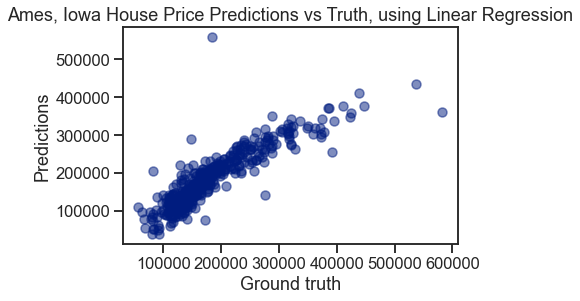

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');
plt.show()

Interpret the graph

type your answer here

Supplementary Activity:
* Choose your own dataset 
* Import the dataset 
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values.
* Perform descriptive statistics such as mean, median and mode
* Compute the correlation
* Use One-hot encoding in categorical features
* Apply feature scaling
* Perform linear regression using one independent variable only using numpy
* Perform linear regression using multiple independent variable using statsmodel
* Perform linear regression using sklearn

### Data Preprocessing

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [166]:
data = pd.read_csv("https://github.com/datasciencedojo/datasets/blob/f0ccab6a7ceafdff780052166fb6fab3311398eb/titanic.csv/?raw=true")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [167]:
# determine thenumber of columns, datapoints, and data types
data.info()

# there are 11 number of columsn, 891 entries/datapoints, and the datatypes for all the columnns are revealed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [168]:
# the name won't be a feature, so I will drop it. It cannot be used for regression.
data.drop("Name",axis = 1, inplace = True)

# I decided to just completely remove the rows with missing data. I think having 183 data points will still be a good representation of the data and will be able to be used for the analysis and regression.
data.dropna(axis =0, how = "any", inplace = True)
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Sex          183 non-null    object 
 4   Age          183 non-null    float64
 5   SibSp        183 non-null    int64  
 6   Parch        183 non-null    int64  
 7   Ticket       183 non-null    object 
 8   Fare         183 non-null    float64
 9   Cabin        183 non-null    object 
 10  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 17.2+ KB


(183, 11)

In [169]:
data.drop("Ticket",axis = 1, inplace = True)

In [170]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C85,C
3,4,1,1,female,35.0,1,0,53.1000,C123,S
6,7,0,1,male,54.0,0,0,51.8625,E46,S
10,11,1,3,female,4.0,1,1,16.7000,G6,S
11,12,1,1,female,58.0,0,0,26.5500,C103,S


In [171]:
# drop Cabin -> too many unique values

data.drop("Cabin",axis = 1, inplace = True)

In [215]:
dummy = pd.get_dummies(data)
dummy1 = dummy.copy()
dummy

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
6,7,0,1,54.0,0,0,51.8625,0,1,0,0,1
10,11,1,3,4.0,1,1,16.7000,1,0,0,0,1
11,12,1,1,58.0,0,0,26.5500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542,1,0,0,0,1
872,873,0,1,33.0,0,0,5.0000,0,1,0,0,1
879,880,1,1,56.0,0,1,83.1583,1,0,1,0,0
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1


In [217]:
dummy.drop("PassengerId", axis = 1, inplace = True)

In [218]:
dummy.shape

(183, 11)

In [219]:
dummy.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241,0.532418,-0.532418,0.104870,-0.038544,-0.095861
Pclass,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235,0.046181,-0.046181,-0.231837,-0.039131,0.238755
Age,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424,-0.184969,0.184969,0.085018,0.019038,-0.088568
SibSp,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433,0.104291,-0.104291,-0.056723,0.169446,0.019780
Parch,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740,0.089581,-0.089581,-0.074372,-0.066406,0.088214
Fare,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000,0.130433,-0.130433,0.240382,0.015625,-0.242172
Sex_female,0.532418,0.046181,-0.184969,0.104291,0.089581,0.130433,1.000000,-1.000000,0.062691,0.004024,-0.063146
Sex_male,-0.532418,-0.046181,0.184969,-0.104291,-0.089581,-0.130433,-1.000000,1.000000,-0.062691,-0.004024,0.063146
Embarked_C,0.104870,-0.231837,0.085018,-0.056723,-0.074372,0.240382,0.062691,-0.062691,1.000000,-0.078017,-0.976579
Embarked_Q,-0.038544,-0.039131,0.019038,0.169446,-0.066406,0.015625,0.004024,-0.004024,-0.078017,1.000000,-0.138314


In [220]:
# apply feature scaling to dummy. Standardize the Age and Fare columns
from sklearn.preprocessing import StandardScaler
scaled = dummy
cols_to_norm = ['Age','Fare']
scaled[cols_to_norm] = StandardScaler().fit_transform(scaled[cols_to_norm])

In [221]:
dummy

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,1,1,0.149065,1,0,-0.097180,1,0,1,0,0
3,1,1,-0.043230,1,0,-0.335997,1,0,0,0,1
6,0,1,1.174636,0,0,-0.352250,0,1,0,0,1
10,1,3,-2.030273,1,1,-0.814070,1,0,0,0,1
11,1,1,1.431029,0,0,-0.684702,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,0.725949,1,1,-0.343166,1,0,0,0,1
872,0,1,-0.171426,0,0,-0.967737,0,1,0,0,1
879,1,1,1.302832,0,1,0.058785,1,0,1,0,0
887,1,1,-1.068801,0,0,-0.639390,1,0,0,0,1


In [222]:
dummy.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241,0.532418,-0.532418,0.104870,-0.038544,-0.095861
Pclass,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235,0.046181,-0.046181,-0.231837,-0.039131,0.238755
Age,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424,-0.184969,0.184969,0.085018,0.019038,-0.088568
SibSp,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433,0.104291,-0.104291,-0.056723,0.169446,0.019780
Parch,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740,0.089581,-0.089581,-0.074372,-0.066406,0.088214
Fare,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000,0.130433,-0.130433,0.240382,0.015625,-0.242172
Sex_female,0.532418,0.046181,-0.184969,0.104291,0.089581,0.130433,1.000000,-1.000000,0.062691,0.004024,-0.063146
Sex_male,-0.532418,-0.046181,0.184969,-0.104291,-0.089581,-0.130433,-1.000000,1.000000,-0.062691,-0.004024,0.063146
Embarked_C,0.104870,-0.231837,0.085018,-0.056723,-0.074372,0.240382,0.062691,-0.062691,1.000000,-0.078017,-0.976579
Embarked_Q,-0.038544,-0.039131,0.019038,0.169446,-0.066406,0.015625,0.004024,-0.004024,-0.078017,1.000000,-0.138314


### Perform linear regression using one independent variable only using numpy

In [223]:
x = dummy1["Age"]
y = dummy1["Fare"]

In [224]:
m, b = np.polyfit(x,y,1) 
print ('The slope of line is {:.2f}.'.format(m))
print ('The y-intercept is {:.2f}.'.format(b))
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b))

The slope of line is -0.45.
The y-intercept is 94.77.
The best fit simple linear regression line is -0.45x + 94.77.


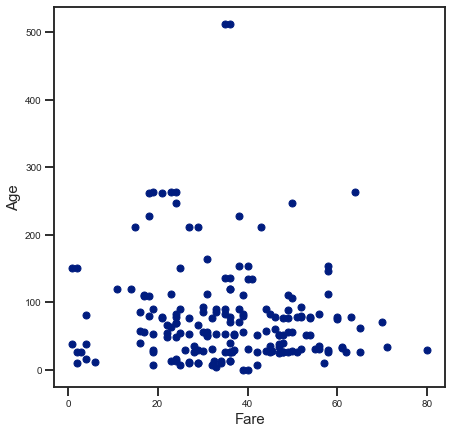

In [228]:
# Display the plot inline
%matplotlib inline

# Increase the size of the plot
plt.figure(figsize=(7,7))

# Create a scatter plot: Number of stores in the District vs. Annual Net Sales
plt.plot(x,y, 'o', markersize = 7)

# Add axis labels and increase the font size
plt.ylabel('Age', fontsize = 15)
plt.xlabel('Fare', fontsize = 15)
# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Display the scatter plot
plt.show()

In [229]:
# Function to predict the net sales from the regression line
def predict(query):
        predict = m * query + b
        return predict

In [230]:
print(predict(50))

72.22073905320572


Conclusion

type your conclusion here